# OpenAI GYM

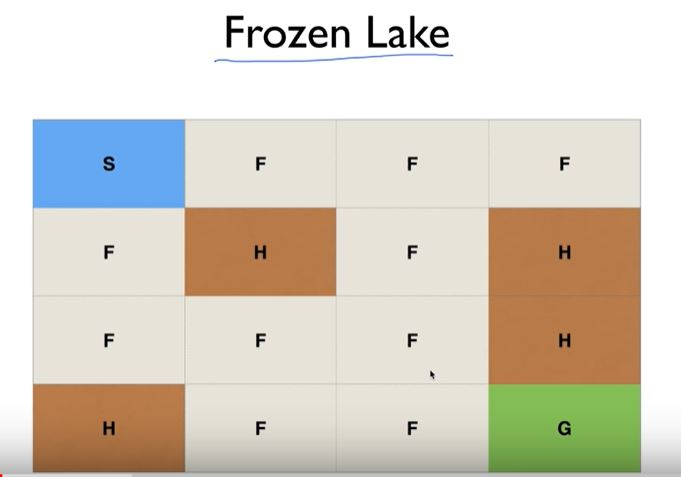
* 환경 : frozen lake 게임
* Agent : 움직이는 주체, 에이전트의 입장에서는 초기에 환경에서 골을 위한 길이 보이지 않는다, 그래서 반복되는 과정을 통해서 학습이 필요
* Action : right, left, up, down
* State : 왼쪽 위부터 순서대로 0, 1, 2, 3 그 아래는 4, 5 이런식으로 표현 가능
* Reward : Goal에 도달 시 1점, 이런 식으로 보상 설정 가능

In [ ]:
# 기본적인 구조
import gym
env = gym.make('FrozenLake-v1') # 환경 생성
observation = env.rest() # 초기 상태로 초기화
for _ in range(1000):
    env.render() # 환경을 화면으로 출력
    action = env.action_space.sample() # 환경에 따른 적절한 action 선정
    observation, reward, done, info = env.step(action) 
    # 환경에서 취한 액션에 따른 State, Reward, 죽었는지 살았는지, 추가정보 등에 대해 리턴

In [ ]:
# Only on Linux
import gym
from gym.envs.registration import register
import sys, tty, termios

# Python arrow keyin
class _Getch:
    def __call__(self):
        fd = sys.stdin.fileno()
        old_settings = termios.tcgetattr(fd)
        try:
            tty.setraw(sys.stdin.fileno())
            ch = sys.stdin.read(3)
        finally:
            termios.tcsetattr(fd, termios.TCSADRAIN, old_settings)
        return ch
    
inkey = _Getch()

# Macros
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

arrow_keys = {
    '/xlb[A' : UP,
    '/xlb[B' : DOWN,
    '/xlb[C' : RIGHT,
    '/xlb[D' : LEFT
} # 이러한 코드가 액션을 의미함


register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name' : '4x4', 'is_slippery' : False}
) # 기존의 프로즌레이크 대신 새로운 프로즌레이크 게임 생성

env = gym.make('FrozenLake-v3')
env.render() 

while True:
    key = inkey()
    if key not in arrow_keys.keys():
        print('Game aborted!')
        break
    
    action = arrow_keys[key]
    state, reward, done, info = env.stept(action)
    env.render()
    print('State:', state, "Action:", action, "Reward:", reward,"Info:", info)
    
    if done:
        print("Finished with reward", reward)
        break

In [ ]:
# Windows
import gym
from gym.envs.registration import register
from colorama import init
from kbhit import KBHit

init(autoreset=True)    # Reset the terminal mode to display ansi color

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')        # is_slippery False
env.render()                             # Show the initial board

key = KBHit()

while True:

    action = key.getarrow();
    if action not in [0, 1, 2, 3]:
        print("Game aborted!")
        break

    state, reward, done, info = env.step(action)
    env.render()
    print("State: ", state, "Action: ", action, "Reward: ", reward, "Info: ", info)

    if done:
        print("Finished with reward", reward)
        break


SFFF
FHFH
FFFH
HFFG
